# EDA on Suicide rates in India 2001-2012

        Exploratory Data Analysis (EDA) on suicide rates in India reveals patterns and trends in demographic factors, socio-economic conditions, and regional variations, aiding in understanding and addressing the complex dynamics influencing suicide occurrences in the country.
        

## Problem Statement

       The escalating suicide rates in India pose a critical public health concern, necessitating a comprehensive understanding of the underlying factors. The problem statement revolves around identifying and analyzing the intricate interplay of socio-economic disparities, mental health issues, and cultural influences that contribute to the rising incidence of suicides. Addressing this multifaceted problem requires targeted interventions and policy measures to mitigate risk factors and enhance mental health support systems across diverse segments of the population.


# About the Dataset:
<h3>Context</h3>

This data set contains yearly suicide detail of all the states/u.t of India by various parameters from 2001 to 2012.

<h3>Content</h3>

Time Period: 2001 - 2012 <br>
Granularity: Yearly <br>
Location: States and U.T's of India

<h3>Parameters</h3>

    a) Suicide causes
    b) Education status
    c) By means adopted
    d) Professional profile
    e) Social status

<h3>Acknowledgements</h3>

National Crime Records Bureau (NCRB), Govt of India has shared this dataset under Govt. Open Data License - India. <br>
Source Link: (https://data.gov.in/)

# 

## Import libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#

## Read dataset from MS Excel file(.csv format)

In [3]:
df = pd.read_csv('Suicides in India 2001-2012.csv')
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


## Understanding the dataframe

In [4]:
print('Number of rows:',df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 237519
Number of columns: 7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [6]:
df.isnull().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

<font color="Green"><b><font size="+0.5">Observation : There are no null values in the dataframe. Hence we can start data processing.</font></b></font>

###

## Data Pre-processing: Analysing each column of the dataframe

In [7]:
df.columns

Index(['State', 'Year', 'Type_code', 'Type', 'Gender', 'Age_group', 'Total'], dtype='object')

In [8]:
df['State'].value_counts()

Madhya Pradesh       6792
Maharashtra          6792
Karnataka            6792
Odisha               6791
Andhra Pradesh       6791
Rajasthan            6791
Bihar                6790
Chhattisgarh         6790
Haryana              6790
Kerala               6788
Uttar Pradesh        6787
Assam                6786
Tamil Nadu           6786
Gujarat              6786
Jharkhand            6785
Tripura              6782
Delhi (Ut)           6782
West Bengal          6780
Punjab               6779
Himachal Pradesh     6774
Jammu & Kashmir      6761
Goa                  6759
Uttarakhand          6758
Sikkim               6742
Mizoram              6737
Meghalaya            6733
Puducherry           6730
Chandigarh           6717
A & N Islands        6712
Daman & Diu          6710
Arunachal Pradesh    6707
Nagaland             6705
D & N Haveli         6704
Manipur              6700
Lakshadweep          6674
Total (All India)     312
Total (States)        312
Total (Uts)           312
Name: State,

<font size="+0.5"  color="Green">
    
- **As we need state wise data Total summation values are not needed for analysis.** 

- **Hence drop rows with values conataining: 'Total (All India)','Total (States)','Total (Uts)'.**


In [9]:
df= df[df['State'].isin(['Total (All India)','Total (States)','Total (Uts)']) == False]

In [10]:
df['State'].value_counts()

Karnataka            6792
Madhya Pradesh       6792
Maharashtra          6792
Andhra Pradesh       6791
Odisha               6791
Rajasthan            6791
Chhattisgarh         6790
Bihar                6790
Haryana              6790
Kerala               6788
Uttar Pradesh        6787
Tamil Nadu           6786
Gujarat              6786
Assam                6786
Jharkhand            6785
Tripura              6782
Delhi (Ut)           6782
West Bengal          6780
Punjab               6779
Himachal Pradesh     6774
Jammu & Kashmir      6761
Goa                  6759
Uttarakhand          6758
Sikkim               6742
Mizoram              6737
Meghalaya            6733
Puducherry           6730
Chandigarh           6717
A & N Islands        6712
Daman & Diu          6710
Arunachal Pradesh    6707
Nagaland             6705
D & N Haveli         6704
Manipur              6700
Lakshadweep          6674
Name: State, dtype: int64

In [11]:
df['Year'].value_counts()

2011    19728
2005    19725
2012    19721
2001    19719
2008    19719
2007    19716
2010    19714
2002    19712
2003    19708
2006    19708
2009    19708
2004    19705
Name: Year, dtype: int64

In [12]:
df['Type_code'].value_counts()

Causes                  109200
Means_adopted            67200
Professional_Profile     49263
Education_Status          6720
Social_Status             4200
Name: Type_code, dtype: int64

In [13]:
df['Type'].value_counts()

Others (Please Specify)                           7263
Illness (Aids/STD)                                4200
By Drowning                                       4200
By touching electric wires                        4200
By Machine                                        4200
                                                  ... 
Graduate                                           840
Middle                                             840
Bankruptcy or Sudden change in Economic Status     350
Not having Children (Barrenness/Impotency          350
By Other means                                     350
Name: Type, Length: 69, dtype: int64

In [14]:
df['Gender'].value_counts()

Male      118411
Female    118172
Name: Gender, dtype: int64

In [15]:
df['Age_group'].value_counts()

15-29     45223
30-44     45193
45-59     45146
60+       45074
0-14      45027
0-100+    10920
Name: Age_group, dtype: int64

In [16]:
df['Total'].describe()

count    236583.000000
mean         30.636225
std         180.272636
min           0.000000
25%           0.000000
50%           0.000000
75%           6.000000
max        8756.000000
Name: Total, dtype: float64

In [17]:
df[df['Total'] == 0].shape

(135473, 7)

<font size="+0.5"  color="Green">
    
- **There are more than 1,35,000 rows contains 0 total deaths which is not useful for analysis.**
- **Dropping rows with 0 entries in total column**
- **df1 dataframe contains entries without 0 deaths**


In [18]:
#df1 dataframe does not contains 0 death entries in the dataframe 

df1 = df[df['Total'] != 0]

In [19]:
df1.shape

(101110, 7)

In [20]:
df1.sample(10)

,State,Year,Type_code,Type,Gender,Age_group,Total
95083,Jammu & Kashmir,2001,Professional_Profile,Farming/Agriculture Activity,Female,30-44,1
192537,Rajasthan,2006,Professional_Profile,Unemployed,Male,60+,1
234632,West Bengal,2007,Professional_Profile,Others (Please Specify),Male,30-44,373
59428,Daman & Diu,2010,Means_adopted,By Hanging,Male,45-59,1
175210,Odisha,2012,Causes,Dowry Dispute,Female,30-44,27
207649,Tamil Nadu,2009,Means_adopted,By Over Alcoholism,Male,60+,11
190572,Rajasthan,2003,Means_adopted,By Fire-Arms,Female,0-14,1
36342,Chandigarh,2005,Means_adopted,By Consuming Other Poison,Female,15-29,2
51964,D & N Haveli,2009,Causes,Other Causes (Please Specity),Male,45-59,4
227546,Uttarakhand,2007,Causes,Causes Not known,Male,45-59,6


#

# Univariate, Bivariate & Multivariate Analysis

## 1) Male Female suicide ratio

In [21]:
df1_causes= df[df['Type_code'] == 'Causes']
df1_causes.shape

(109200, 7)

In [22]:
df1_causes.sample(10)

,State,Year,Type_code,Type,Gender,Age_group,Total
112822,Karnataka,2009,Causes,Other Causes (Please Specity),Male,30-44,636
1751,A & N Islands,2004,Causes,Divorce,Female,15-29,0
234702,West Bengal,2008,Causes,Poverty,Female,0-14,0
212728,Tripura,2005,Causes,Physical Abuse (Rape/Incest Etc.),Female,15-29,0
184637,Punjab,2005,Causes,Family Problems,Female,0-14,0
139350,Maharashtra,2008,Causes,Not having Children(Barrenness/Impotency,Male,45-59,6
49647,D & N Haveli,2005,Causes,Poverty,Female,30-44,0
106485,Jharkhand,2010,Causes,Poverty,Male,0-14,0
108234,Karnataka,2001,Causes,Dowry Dispute,Male,15-29,1
182471,Punjab,2001,Causes,Other Causes (Please Specity),Male,15-29,5


In [23]:
Total_deaths = df1_causes['Total'].sum()
female_deaths = df1_causes.groupby(['Gender'])['Total'].sum()[0]
male_deaths =  df1_causes.groupby(['Gender'])['Total'].sum()[1]
print('Total Deaths from 2001 to 2012:',Total_deaths)
print('Male Deaths:', male_deaths)
print('Female Deaths:',female_deaths)

Total Deaths from 2001 to 2012: 1440974
Male Deaths: 923238
Female Deaths: 517736


<function matplotlib.pyplot.show(close=None, block=None)>

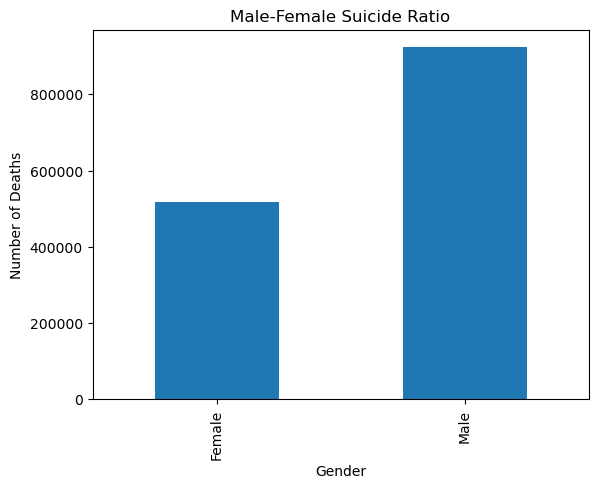

In [24]:
df1_causes.groupby(['Gender'])['Total'].sum().plot(kind = 'bar')
plt.title('Male-Female Suicide Ratio')
plt.xlabel('Gender')
plt.ylabel('Number of Deaths')
plt.show


<font size="+0.5"  color="Green">
    
- **OBSERVATION**
- **There is a considerable difference in male and female suicides.** 
- **Male suicides are 40% higher than female suicides.**

#

## 2) Year Wise Deaths from 2001 to 2012

In [25]:
df1_causes.groupby(['Year'])['Total'].sum()

Year
2001    108506
2002    110417
2003    110851
2004    113697
2005    113914
2006    118112
2007    122637
2008    125017
2009    127151
2010    134599
2011    135585
2012    120488
Name: Total, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

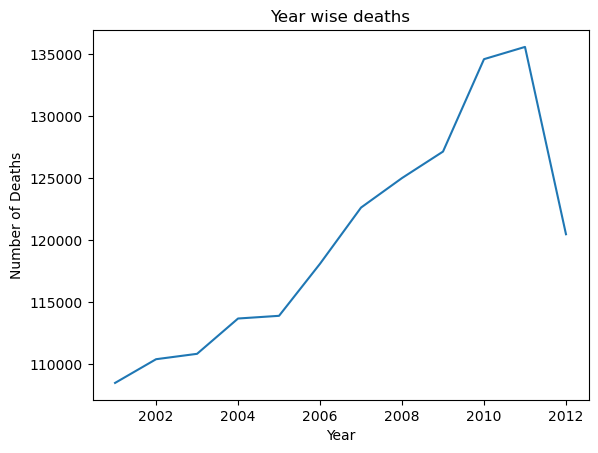

In [26]:
df1_causes.groupby(['Year'])['Total'].sum().plot(kind = 'line')
plt.title('Year wise deaths')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.show

<font size="+0.5"  color="Green">
    
- **OBSERVATION**
- **The graph shows consistant increase in the deaths over the years. Minimal but sudden drop in deaths in 2012.**

#

## 3) States with highest suicide rates

In [27]:
state_counts = df1_causes.groupby(['State'])['Total'].sum().sort_values(ascending=False).head(10)
state_counts

State
Maharashtra       180389
Tamil Nadu        163813
Andhra Pradesh    162820
West Bengal       161030
Karnataka         146965
Kerala            107936
Madhya Pradesh     90307
Gujarat            66177
Chhattisgarh       60495
Odisha             53448
Name: Total, dtype: int64

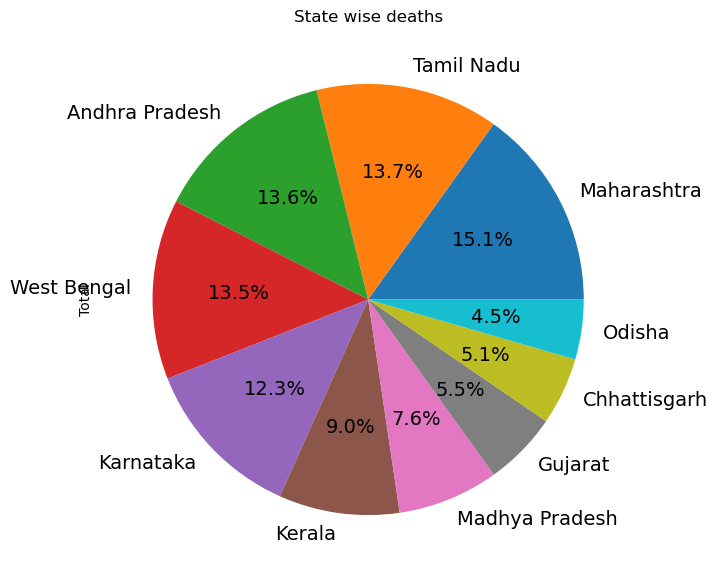

In [28]:
plt.figure(figsize=(7,7))
state_counts.plot.pie(x='values', autopct='%1.1f%%', startangle=0, fontsize=14)
plt.title('State wise deaths')
plt.show()

<font size="+0.5"  color="Green">
    
- **OBSERVATION**
- **Maharashtra > Tamil Nadu > Andra Pradesh > West Bengal > Karnataka are having highest suicide rates in India**

#

## 4) Suicide rates and Age Group

In [29]:
Age_suicide = df1_causes.groupby(['Age_group'])['Total'].sum()
Age_suicide

Age_group
0-14      32685
15-29    509776
30-44    488713
45-59    294333
60+      115467
Name: Total, dtype: int64

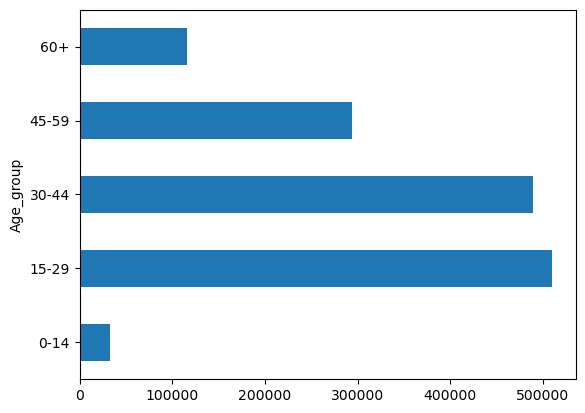

In [30]:
Age_suicide.plot(kind = 'barh')
plt.show()

<font size="+0.5"  color="Green">
    
- **OBSERVATION**
- **Younger generation ranging from 15 to 29 years of age are commiting more suicides than other age group**
- **Age group from 30 to 44 also the 2nd highest category in terms of suicides in India**
- **This is a threat to India's Demographic Dividend.**

#

In [31]:
df1.sample(10)

,State,Year,Type_code,Type,Gender,Age_group,Total
100793,Jammu & Kashmir,2011,Social_Status,Seperated,Male,0-100+,10
140188,Maharashtra,2009,Professional_Profile,Service (Government),Female,15-29,8
9931,Andhra Pradesh,2006,Means_adopted,By coming under running vehicles/trains,Male,45-59,136
135298,Maharashtra,2001,Causes,Cancer,Female,30-44,11
172758,Odisha,2007,Professional_Profile,Professional Activity,Male,30-44,29
40651,Chhattisgarh,2001,Causes,Cancellation/Non-Settlement of Marriage,Male,30-44,2
14156,Arunachal Pradesh,2002,Causes,Failure in Examination,Male,15-29,1
105551,Jharkhand,2008,Causes,Paralysis,Male,60+,1
30209,Bihar,2006,Means_adopted,By Drowning,Female,45-59,8
185913,Punjab,2007,Causes,Poverty,Male,30-44,6


#

## 5) Analysing means adopted to commit suicide

In [32]:
df1['Type_code'].value_counts()

Causes                  39531
Means_adopted           29337
Professional_Profile    23291
Education_Status         5602
Social_Status            3349
Name: Type_code, dtype: int64

In [33]:
df1_means_adopted = df1[df1['Type_code'] == 'Means_adopted']
df1_means_adopted

,State,Year,Type_code,Type,Gender,Age_group,Total
277,A & N Islands,2001,Means_adopted,By Hanging,Female,0-14,2
307,A & N Islands,2001,Means_adopted,By Hanging,Male,0-14,2
312,A & N Islands,2001,Means_adopted,By Fire/Self Immolation,Female,15-29,2
315,A & N Islands,2001,Means_adopted,By Consuming Other Poison,Female,15-29,9
316,A & N Islands,2001,Means_adopted,By Hanging,Female,15-29,20
...,...,...,...,...,...,...,...
237393,West Bengal,2012,Means_adopted,By Jumping off Moving Vehicles/Trains,Male,60+,7
237394,West Bengal,2012,Means_adopted,By Consuming Insecticides,Male,60+,53
237395,West Bengal,2012,Means_adopted,By Other means (please specify),Male,60+,241
237396,West Bengal,2012,Means_adopted,By Consuming Other Poison,Male,60+,99


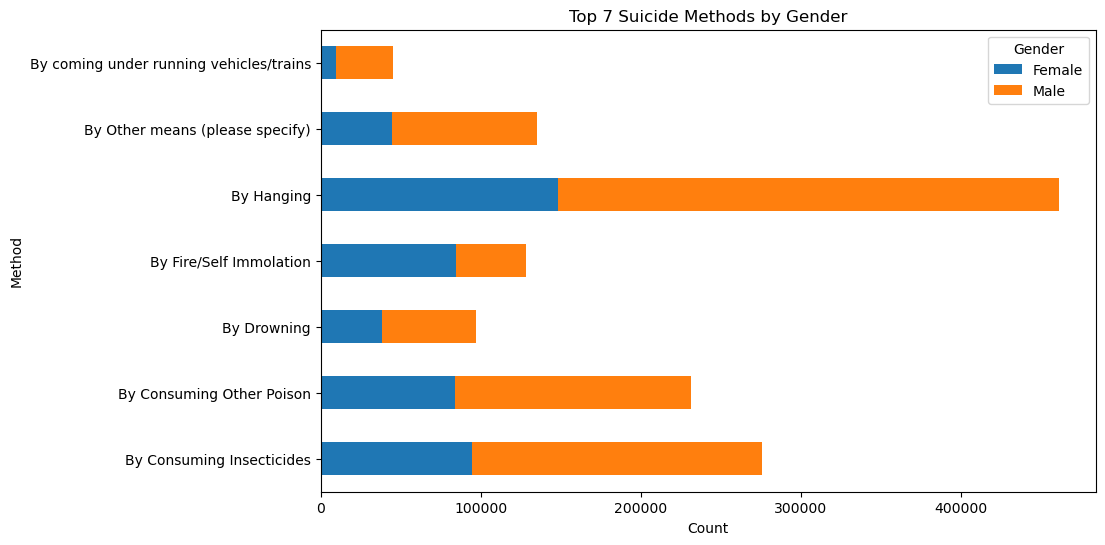

In [34]:
# Top 7 methods/means adopted by people to commit suicide sagregated by Gender

top_7_methods = df1_means_adopted['Type'].value_counts().nlargest(7).index
df_top_7 = df1_means_adopted[df1_means_adopted['Type'].isin(top_7_methods)]
data_top_7 = df_top_7.groupby(['Type', 'Gender'])['Total'].sum()
data_plot_top_7 = data_top_7.unstack()

data_plot_top_7.plot(kind='barh', stacked = True, figsize=(10, 6))
plt.title('Top 7 Suicide Methods by Gender')
plt.xlabel('Count')
plt.ylabel('Method')
plt.legend(title='Gender')
plt.show()


<font size="+0.5"  color="Green">
    
- **OBSERVATION**
- **Among other methods Hanging and consuming poison/other substances are highest as per graph**
- **Male suicides are relatively high in all categorical methods except women casualties are more than male by fire/self immolation method**

#

## 6) Top 5 suicide methods and Age relationship

In [35]:
age_method = df1_means_adopted.groupby(['Type','Age_group'])['Total'].sum()
age_method

Type                        Age_group
By Consuming Insecticides   0-14          4980
                            15-29        99949
                            30-44        92554
                            45-59        56368
                            60+          21650
                                         ...  
By touching electric wires  0-14           420
                            15-29         3707
                            30-44         3779
                            45-59         2220
                            60+            690
Name: Total, Length: 85, dtype: int64

In [36]:
data_plot = age_method.unstack()
data_plot

Age_group,0-14,15-29,30-44,45-59,60+
Type,,,,,
By Consuming Insecticides,4980,99949,92554,56368,21650
By Consuming Other Poison,4330,80860,78361,49517,18110
By Drowning,4825,32457,31318,18327,9784
By Fire-Arms,178,2355,2261,1149,351
By Fire/Self Immolation,2506,54902,43458,19436,7704
By Hanging,7292,169622,159188,92455,32398
By Jumping from (Building),243,2459,2951,1584,634
By Jumping from (Other sites),298,2659,2927,1592,651
By Jumping off Moving Vehicles/Trains,164,2627,3056,1614,655


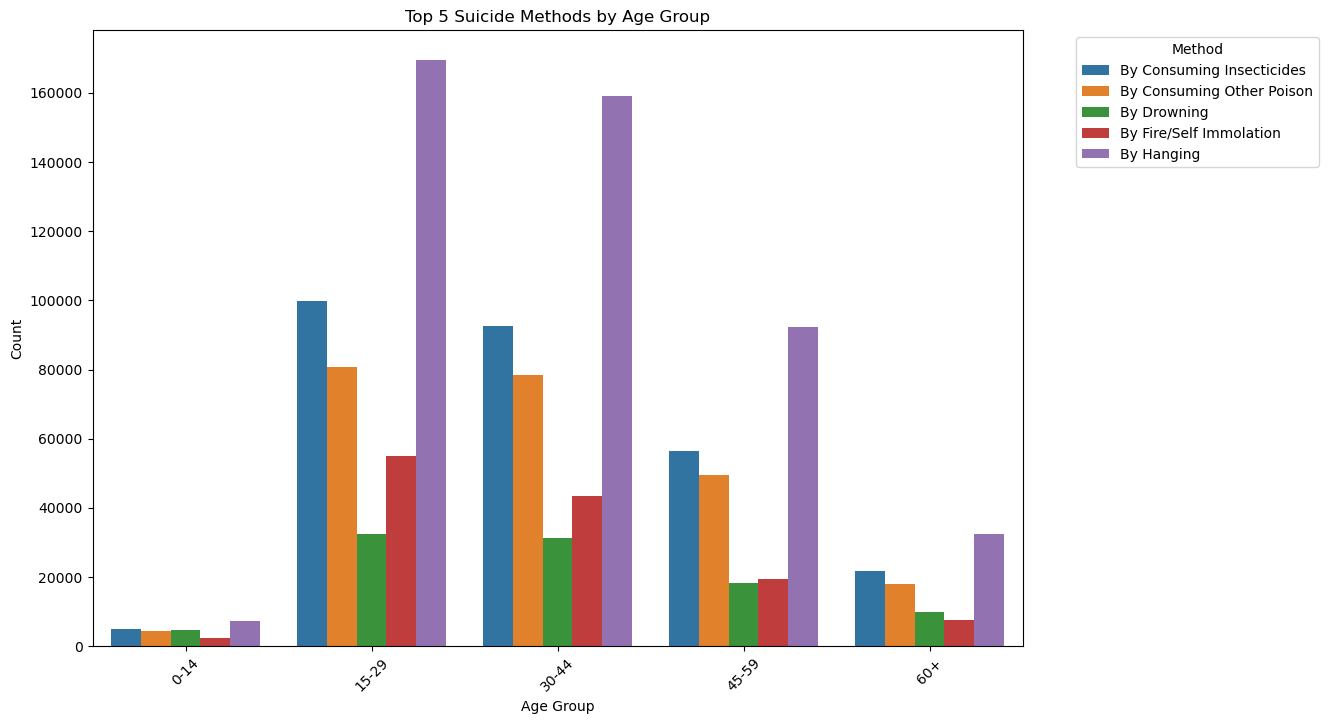

In [37]:
# Selecting the top 5 suicide methods to determine Age relationship
top_5_methods = df1_means_adopted['Type'].value_counts().nlargest(5).index
df_top_5 = df1_means_adopted[df1_means_adopted['Type'].isin(top_5_methods)]
age_method_top_5 = df_top_5.groupby(['Type', 'Age_group'])['Total'].sum()
age_method_top_5 = age_method_top_5.reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=age_method_top_5, x='Age_group', y='Total', hue='Type')
plt.title('Top 5 Suicide Methods by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<font size="+0.5"  color="Green">
    
- **OBSERVATION**
- **Hanging and consumption of poison casualties are high in all the age groups**

#

## 7) Education Type and Gender Relation

In [38]:
df1_education_status = df1[df1['Type_code'] == 'Education_Status']

In [39]:
df1_education_status['Type'].value_counts()

Middle                                      811
Primary                                     803
Matriculate/Secondary                       803
No Education                                773
Hr. Secondary/Intermediate/Pre-Universit    733
Graduate                                    643
Diploma                                     529
Post Graduate and Above                     507
Name: Type, dtype: int64

In [40]:
education_type_gender_relation = df1_education_status.groupby(['Type','Gender'])['Total'].sum().unstack()

<Figure size 1200x800 with 0 Axes>

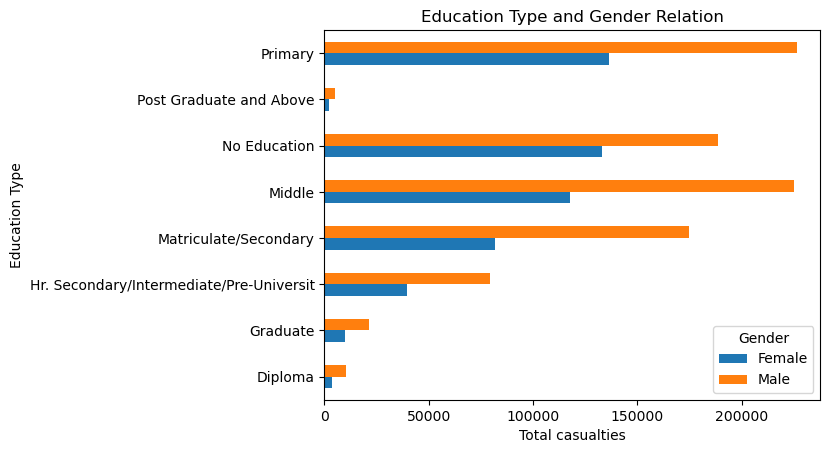

In [41]:
plt.figure(figsize=(12, 8))
education_type_gender_relation.plot(kind='barh', stacked=False)
plt.title('Education Type and Gender Relation')
plt.xlabel('Total casualties')
plt.ylabel('Education Type')
plt.legend(title='Gender')
plt.show()

<font size="+0.5"  color="Green">
    
- **OBSERVATION**
- **Among other education categories No education, Primary, Middle school educators are highest as per graph**
- **The Graph shows that more the education a person aquires less chances that he/she commits suicides**

#

## 8) Suicides based on Professional_Profile 

In [44]:
df1_Professional_Profile = df1[df1['Type_code'] == 'Professional_Profile']
df1_Professional_Profile['Type'].value_counts()

Others (Please Specify)              5509
Unemployed                           2424
Farming/Agriculture Activity         2310
Service (Private)                    2230
Student                              1854
Self-employed (Business activity)    1793
Service (Government)                 1771
House Wife                           1543
Professional Activity                1513
Public Sector Undertaking            1506
Retired Person                        838
Name: Type, dtype: int64

In [59]:
Professional_Profile_gender_relation = df1_Professional_Profile.groupby(['Type'])['Total'].sum()

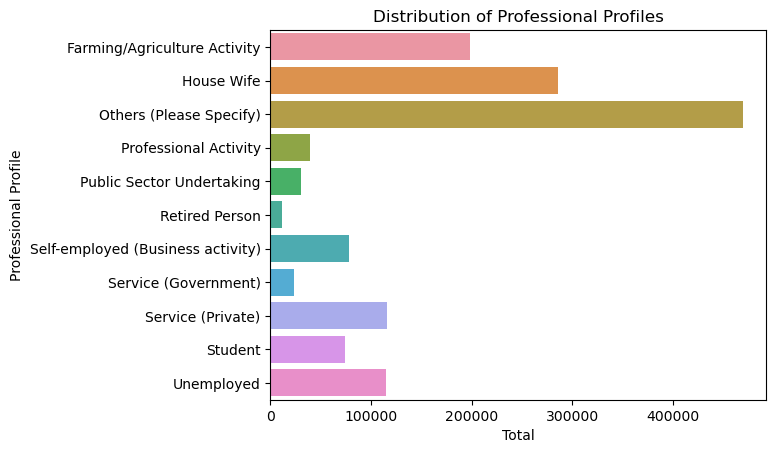

In [61]:
df_professional_profile = Professional_Profile_gender_relation.reset_index()
sns.barplot(data=df_professional_profile, x='Total', y='Type', orient='h')
plt.title('Distribution of Professional Profiles')
plt.xlabel('Total')
plt.ylabel('Professional Profile')
plt.show()

<font size="+0.5"  color="Green">
    
- **OBSERVATION**
- **House Wife and Farmers categories having most casualties among other professional profiles**

#